## Importing necessary libraries

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

## Load the dataset

In [137]:
rental_data = pd.read_excel('HalifaxRentalsSt.xlsx')

In [138]:
# View the first few rows of the DataFrame
print(rental_data.head())

     Sl           Sitename                                       Listing Name  \
0  1403          Kijiji.ca  $675 Sublet Available Now! Downtown Halifax Ap...   
1  1102          Kijiji.ca  Ocean view new condo with 2 bedrooms + two bat...   
2  1280          Kijiji.ca     1 and 2 bedroom new building North end Halifax   
3  1483          Kijiji.ca  1 AND 2 BEDROOMS AVAILABLE JUNE 1ST! DOWNTOWN ...   
4  1106  findallrentals.ca       1 bedroom apartment of 527 sq. ft in Halifax   

   ApartmentSize  MonthlyRent Location  Bedroom  Bathroom  \
0           1600          675  Halifax        4       2.0   
1            700         2900  Halifax        2       2.0   
2            510         2075  Halifax        1       1.0   
3            600         2125  Halifax        1       1.0   
4            527         1995  Halifax        1       1.0   

                Street Name Street Number  
0            Halifax Street          Hali  
1  Wellington Street  treet          1048  
2       Bilby 

In [139]:
# Get summary statistics of numeric columns
print(rental_data.describe())

                Sl  ApartmentSize  MonthlyRent     Bedroom    Bathroom
count   404.000000     404.000000   404.000000  404.000000  404.000000
mean   1262.945545     926.306931  2221.626238    1.611386    1.292079
std     153.295793     528.372692   749.170397    0.910359    0.543481
min    1001.000000     100.000000   130.000000    0.000000    1.000000
25%    1141.750000     600.000000  1800.000000    1.000000    1.000000
50%    1244.500000     800.000000  2100.000000    2.000000    1.000000
75%    1397.250000    1092.500000  2600.000000    2.000000    1.500000
max    1583.000000    4400.000000  6600.000000    5.000000    4.000000


In [140]:
# Display the DataFrame
rental_data

,Sl,Sitename,Listing Name,ApartmentSize,MonthlyRent,Location,Bedroom,Bathroom,Street Name,Street Number
0,1403,Kijiji.ca,$675 Sublet Available Now! Downtown Halifax Ap...,1600,675,Halifax,4,2.0,Halifax Street,Hali
1,1102,Kijiji.ca,Ocean view new condo with 2 bedrooms + two bat...,700,2900,Halifax,2,2.0,Wellington Street treet,1048
2,1280,Kijiji.ca,1 and 2 bedroom new building North end Halifax,510,2075,Halifax,1,1.0,Bilby Street ytreet,Bilb
3,1483,Kijiji.ca,1 AND 2 BEDROOMS AVAILABLE JUNE 1ST! DOWNTOWN ...,600,2125,Halifax,1,1.0,Queen Street ntreet,Quee
4,1106,findallrentals.ca,1 bedroom apartment of 527 sq. ft in Halifax,527,1995,Halifax,1,1.0,Tower Street,1078
...,...,...,...,...,...,...,...,...,...,...
399,1477,Kijiji.ca,Water and Bridge Views,900,1900,Halifax,1,1.0,N Ridge etreet,N Ri
400,1427,Kijiji.ca,Waterfront home on Northwest Arm available April,1700,3475,Halifax,2,2.0,Halifax Street,Hali
401,1269,findallrentals.ca,1 bedroom apartment of 409 sq. ft in Halifax,409,3695,Halifax,1,1.0,Mumford Rd 0treet,7037
402,1374,Kijiji.ca,West End 1 Bedroom/1Bathroom Apartment w/ Parking,1000,1900,Halifax,1,1.0,Halifax Street,Hali


## Data preprocessing

In [141]:
# Data Cleaning - Dropping Missing Values:
rental_data.dropna(inplace=True)
# Explanation: Removes any rows with missing values (NaNs) from the DataFrame and updates the DataFrame in place.

In [142]:
# Display the DataFrame
# Get summary statistics of numeric columns
print(rental_data.describe())
rental_data

                Sl  ApartmentSize  MonthlyRent     Bedroom    Bathroom
count   404.000000     404.000000   404.000000  404.000000  404.000000
mean   1262.945545     926.306931  2221.626238    1.611386    1.292079
std     153.295793     528.372692   749.170397    0.910359    0.543481
min    1001.000000     100.000000   130.000000    0.000000    1.000000
25%    1141.750000     600.000000  1800.000000    1.000000    1.000000
50%    1244.500000     800.000000  2100.000000    2.000000    1.000000
75%    1397.250000    1092.500000  2600.000000    2.000000    1.500000
max    1583.000000    4400.000000  6600.000000    5.000000    4.000000


,Sl,Sitename,Listing Name,ApartmentSize,MonthlyRent,Location,Bedroom,Bathroom,Street Name,Street Number
0,1403,Kijiji.ca,$675 Sublet Available Now! Downtown Halifax Ap...,1600,675,Halifax,4,2.0,Halifax Street,Hali
1,1102,Kijiji.ca,Ocean view new condo with 2 bedrooms + two bat...,700,2900,Halifax,2,2.0,Wellington Street treet,1048
2,1280,Kijiji.ca,1 and 2 bedroom new building North end Halifax,510,2075,Halifax,1,1.0,Bilby Street ytreet,Bilb
3,1483,Kijiji.ca,1 AND 2 BEDROOMS AVAILABLE JUNE 1ST! DOWNTOWN ...,600,2125,Halifax,1,1.0,Queen Street ntreet,Quee
4,1106,findallrentals.ca,1 bedroom apartment of 527 sq. ft in Halifax,527,1995,Halifax,1,1.0,Tower Street,1078
...,...,...,...,...,...,...,...,...,...,...
399,1477,Kijiji.ca,Water and Bridge Views,900,1900,Halifax,1,1.0,N Ridge etreet,N Ri
400,1427,Kijiji.ca,Waterfront home on Northwest Arm available April,1700,3475,Halifax,2,2.0,Halifax Street,Hali
401,1269,findallrentals.ca,1 bedroom apartment of 409 sq. ft in Halifax,409,3695,Halifax,1,1.0,Mumford Rd 0treet,7037
402,1374,Kijiji.ca,West End 1 Bedroom/1Bathroom Apartment w/ Parking,1000,1900,Halifax,1,1.0,Halifax Street,Hali


##  Exploratory Data Analysis (EDA)

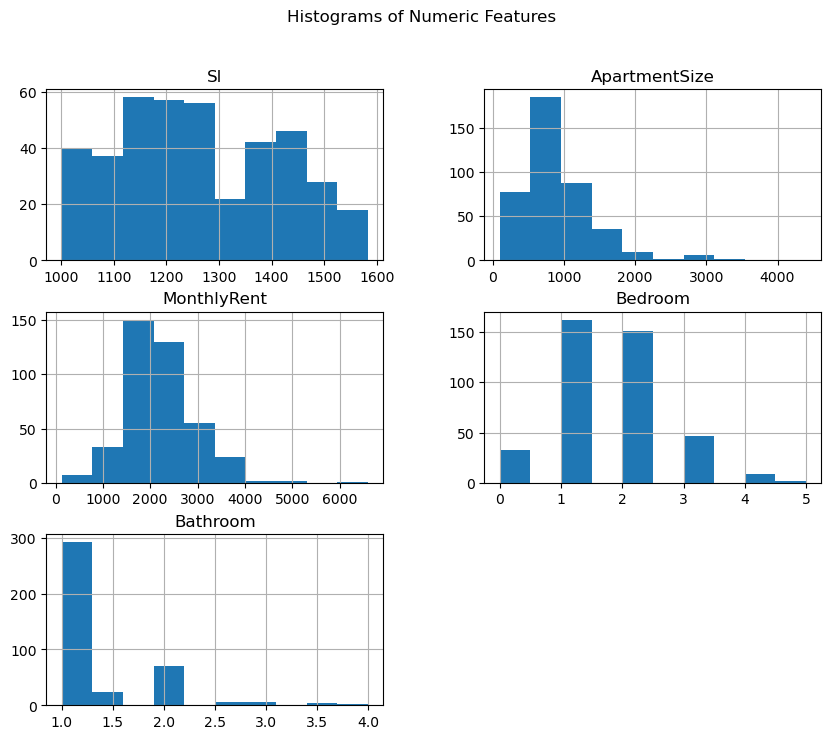

In [143]:
# Histograms of numeric features
rental_data.hist(figsize=(10, 8))
plt.suptitle('Histograms of Numeric Features')
plt.show()

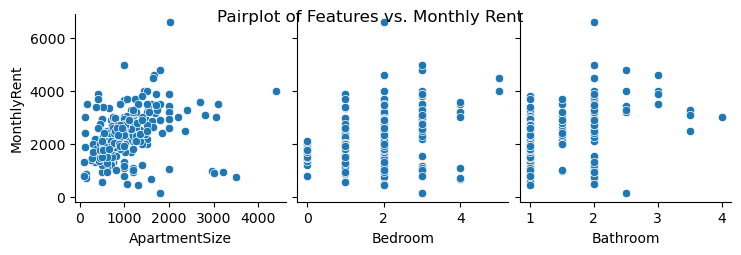

In [144]:
# Pairplot to visualize relationships between features and target variable
sns.pairplot(rental_data, x_vars=['ApartmentSize', 'Bedroom', 'Bathroom'], y_vars='MonthlyRent', kind='scatter')
plt.suptitle('Pairplot of Features vs. Monthly Rent')
plt.show()

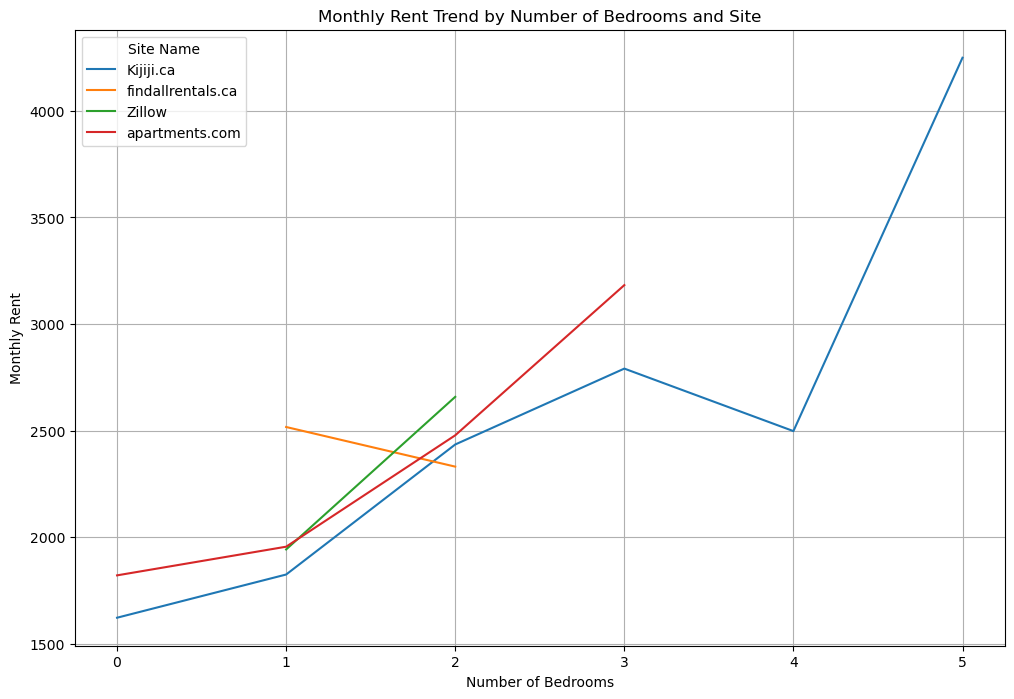

In [145]:
# To visualize the trend of monthly rent by the number of bedrooms across different sites
# Line chart
plt.figure(figsize=(12, 8))
sns.lineplot(data=rental_data, x='Bedroom', y='MonthlyRent', hue='Sitename', errorbar=None)
plt.title('Monthly Rent Trend by Number of Bedrooms and Site')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Monthly Rent')
plt.legend(title='Site Name')
plt.grid(True)
plt.show()

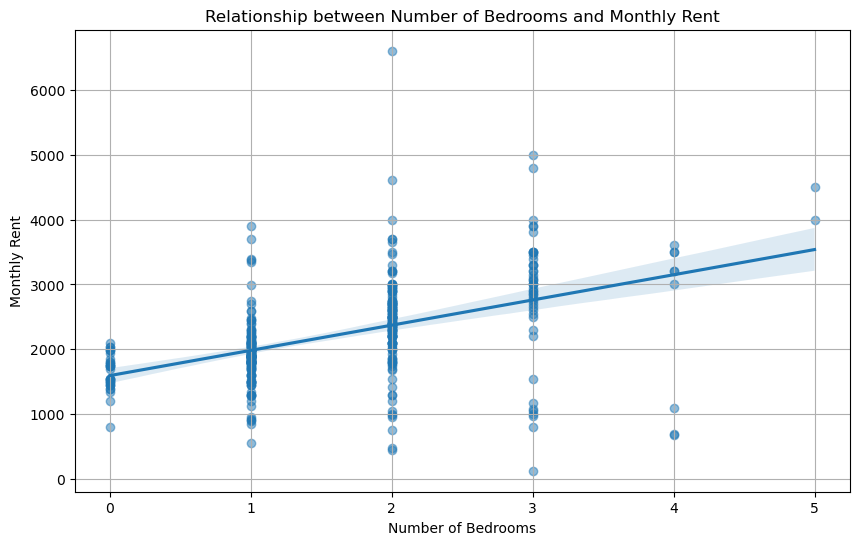

In [146]:
# Scatter plot with trendline
plt.figure(figsize=(10, 6))
sns.regplot(data=rental_data, x='Bedroom', y='MonthlyRent', scatter_kws={'alpha':0.5})
plt.title('Relationship between Number of Bedrooms and Monthly Rent')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Monthly Rent')
plt.grid(True)
plt.show()

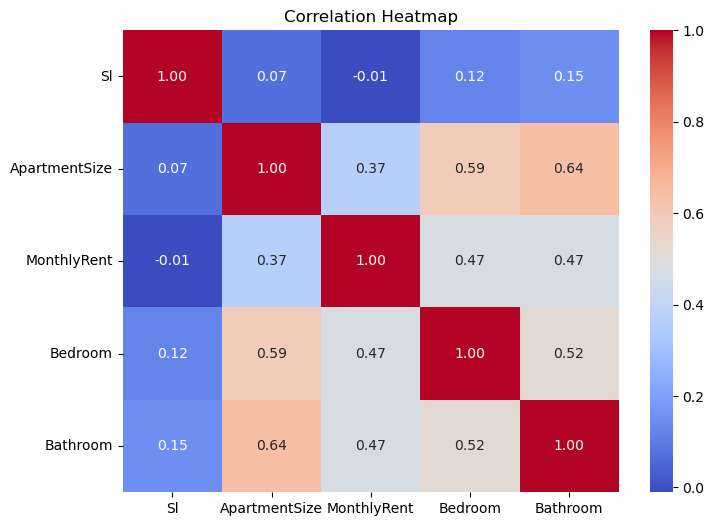

In [147]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rental_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Monthly Rent Prediction

In [148]:
# Grouping the data by 'Street Name' and calculating the mean for numerical columns
grouped_data = rental_data.groupby('Street Name').agg(
    Average_Apartment_Size=('ApartmentSize', 'mean'),
    Average_Monthly_Rent=('MonthlyRent', 'mean'),
    Average_Bedrooms=('Bedroom', 'mean'),
    Average_Bathrooms=('Bathroom', 'mean'),
    Count_Listings=('Street Name', 'size')
).reset_index()

grouped_data.head()

,Street Name,Average_Apartment_Size,Average_Monthly_Rent,Average_Bedrooms,Average_Bathrooms,Count_Listings
0,& Street,957.0,2450.0,2.0,1.00,1
1,"2001 Brunswick Street, Halifax, NS, B3J 3L8",2000.0,3200.0,3.0,2.50,1
2,Alabaster Way street,1083.5,1975.0,2.0,1.00,2
3,Allan Street ntreet,130.0,700.0,4.0,1.00,1
4,Almon Street ntreet,1199.5,2747.5,2.5,1.75,2


In [149]:
# Identify streets with at least 5 listings
streets_with_enough_data = grouped_data[grouped_data['Count_Listings'] >= 5]

streets_with_enough_data

,Street Name,Average_Apartment_Size,Average_Monthly_Rent,Average_Bedrooms,Average_Bathrooms,Count_Listings
25,Brunswick Street,723.333333,2229.444444,1.222222,1.000000,9
26,Brunswick Street Htreet,696.125000,2165.625000,1.125000,1.000000,8
58,Fenwick St Htreet,805.000000,2542.142857,1.428571,1.285714,7
66,Halifax Street,1050.895349,2135.988372,1.825581,1.406977,86
109,Mumford Rd Htreet,1278.600000,3339.000000,2.200000,2.000000,5
151,South Park Htreet,808.636364,2489.727273,1.272727,1.227273,11
154,South Park Street,750.000000,2669.166667,1.333333,1.333333,6


In [150]:
# Redefining the linear regression model
model = LinearRegression()

# Training the model with aligned data
model.fit(X_train, y_train)

# Predicting the rent with the trained model
y_pred = model.predict(X_test)

# Calculating the performance metrics: Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(2.440287773352546e+32, -5.085555724560784e+26)

In [151]:
# Load the necessary original columns for modeling
original_data_for_modeling = rental_data[['Street Name', 'Bedroom', 'MonthlyRent']]

# One-hot encode the 'Street Name' in the original dataset
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  
street_encoded = encoder.fit_transform(original_data_for_modeling[['Street Name']])
street_encoded_df = pd.DataFrame(street_encoded, columns=encoder.get_feature_names_out())

# Combine the encoded street names with the 'Bedroom' feature
model_data_direct = pd.concat([street_encoded_df, original_data_for_modeling[['Bedroom']]], axis=1)

# Target variable from the original data
target_direct = original_data_for_modeling['MonthlyRent']

# Split the dataset into training and testing sets for the direct input model
X_train_direct, X_test_direct, y_train_direct, y_test_direct = train_test_split(model_data_direct, target_direct, test_size=0.2, random_state=0)

# Redefine and train the linear regression model for direct input
model_direct = LinearRegression()
model_direct.fit(X_train_direct, y_train_direct)

# Predict the rent with the trained model
y_pred_direct = model_direct.predict(X_test_direct)

# Calculate the performance metrics: Mean Squared Error (MSE) and R-squared (R2) for the direct model
mse_direct = mean_squared_error(y_test_direct, y_pred_direct)
r2_direct = r2_score(y_test_direct, y_pred_direct)

mse_direct, r2_direct

(2.440287773352546e+32, -5.085555724560784e+26)

In [152]:
# Prepare your data with necessary preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score


encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
street_encoded = encoder.fit_transform(rental_data[['Street Name']])
street_encoded_df = pd.DataFrame(street_encoded, columns=encoder.get_feature_names_out())
model_data = pd.concat([street_encoded_df, rental_data[['Bedroom']]], axis=1)
target = rental_data['MonthlyRent']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(model_data, target, test_size=0.2, random_state=0)

# Train the Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Function to predict rent based on user input
def predict_rent():
    # Get user input for street name and number of bedrooms
    street_name = input("Enter the street name: ")
    bedrooms = int(input("Enter the number of bedrooms: "))
    
    # Prepare the input data for prediction
    input_data = pd.DataFrame({'Street Name': [street_name], 'Bedroom': [bedrooms]})
    encoded_street = encoder.transform(input_data[['Street Name']])
    input_features = np.concatenate([encoded_street, np.array([[bedrooms]])], axis=1)
    
    # Predict the rent using the trained model
    predicted_rent = model.predict(input_features)
    return predicted_rent[0]

# Call the function to make a prediction
predicted_rent = predict_rent()
print(f"Predicted rent: ${predicted_rent:.2f}")

Enter the street name: Barrington Street
Enter the number of bedrooms: 2
Predicted rent: $2858.94


C:\Users\palla\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Data Modelling

In [153]:
# Extract relevant variables
features = rental_data[['ApartmentSize', 'Bedroom', 'Bathroom']]
target = rental_data['MonthlyRent']

In [154]:
# Split the dataset into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(features, target, test_size=0.2, random_state=42)

In [155]:
# Feature scaling for regression
scaler_reg = StandardScaler()
X_train_scaled_reg = scaler_reg.fit_transform(X_train_reg)
X_test_scaled_reg = scaler_reg.transform(X_test_reg)

## Regression

### Linear Regression

Linear Regression Mean Squared Error: 715036.9566621106
Linear Regression Mean Absolute Error: 537.8217175637598


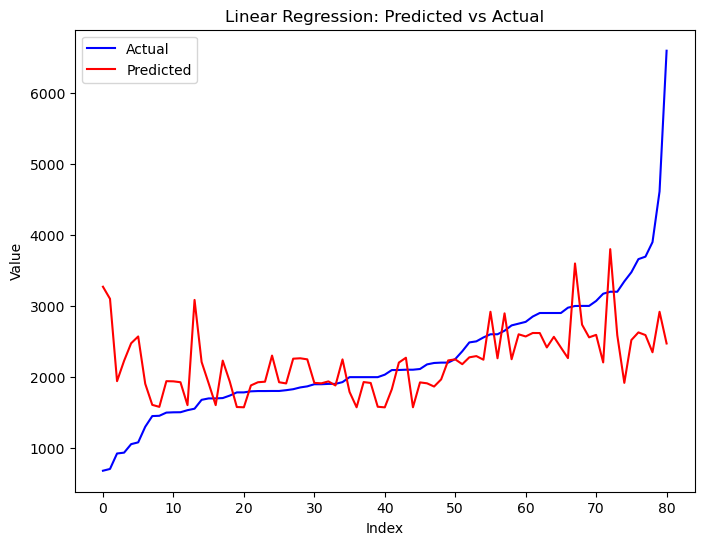

In [156]:
# Modeling - Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled_reg, y_train_reg)

# Model evaluation - Linear Regression
y_pred_linear = linear_model.predict(X_test_scaled_reg)
mse_linear = mean_squared_error(y_test_reg, y_pred_linear)
mae_linear = mean_absolute_error(y_test_reg, y_pred_linear)
print("Linear Regression Mean Squared Error:", mse_linear)
print("Linear Regression Mean Absolute Error:", mae_linear)

# Sort the test dataset by actual values for better visualization
sorted_indices = y_test_reg.argsort()

plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(y_test_reg)), y_test_reg.iloc[sorted_indices], color='blue', label='Actual')
plt.plot(np.arange(len(y_test_reg)), y_pred_linear[sorted_indices], color='red', label='Predicted')
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

### Ridge Regression

In [157]:
# Modeling - Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled_reg, y_train_reg)

# Model evaluation - Ridge Regression
y_pred_ridge = ridge_model.predict(X_test_scaled_reg)
mse_ridge = mean_squared_error(y_test_reg, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test_reg, y_pred_ridge)
print("Ridge Regression Mean Squared Error:", mse_ridge)
print("Ridge Regression Mean Absolute Error:", mae_ridge)

Ridge Regression Mean Squared Error: 714101.5522919412
Ridge Regression Mean Absolute Error: 537.5437307267028


### Lasso Regression

In [158]:
# Modeling - Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled_reg, y_train_reg)

# Model evaluation - Lasso Regression
y_pred_lasso = lasso_model.predict(X_test_scaled_reg)
mse_lasso = mean_squared_error(y_test_reg, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test_reg, y_pred_lasso)
print("Lasso Regression Mean Squared Error:", mse_lasso)
print("Lasso Regression Mean Absolute Error:", mae_lasso)

Lasso Regression Mean Squared Error: 714911.4213049002
Lasso Regression Mean Absolute Error: 537.7827723904285


## Classification

### Splitting the data

In [159]:
# Split the dataset into training and testing sets for classification
y_class = np.where(rental_data['MonthlyRent'] <= rental_data['MonthlyRent'].quantile(0.75), 1, 0)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(features, y_class, test_size=0.2, random_state=42)

# Feature scaling for classification
scaler_cls = StandardScaler()
X_train_scaled_cls = scaler_cls.fit_transform(X_train_cls)
X_test_scaled_cls = scaler_cls.transform(X_test_cls)

### Logistic Regression


Logistic Regression Accuracy (Classification): 0.7777777777777778
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.42      0.53        24
           1       0.79      0.93      0.85        57

    accuracy                           0.78        81
   macro avg       0.75      0.67      0.69        81
weighted avg       0.77      0.78      0.76        81

Confusion Matrix:
[[10 14]
 [ 4 53]]


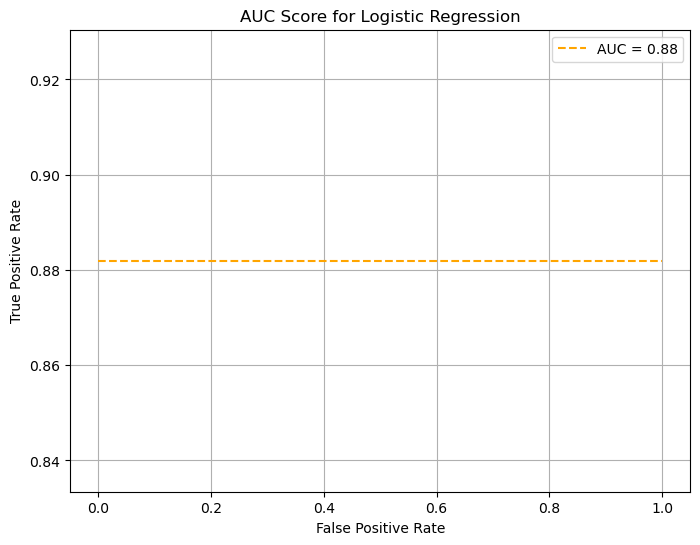

AUC Score: 0.8819444444444444


In [160]:
# Modeling - Logistic Regression for Classification
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled_cls, y_train_cls)

# Model evaluation - Logistic Regression for Classification
y_pred_logistic_cls = logistic_model.predict(X_test_scaled_cls)
accuracy_logistic_cls = accuracy_score(y_test_cls, y_pred_logistic_cls)
print("\nLogistic Regression Accuracy (Classification):", accuracy_logistic_cls)
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_logistic_cls, zero_division=1))
print("Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_logistic_cls))

# Calculate the predicted probabilities for positive class
y_prob_logistic_cls = logistic_model.predict_proba(X_test_scaled_cls)[:, 1]

# Calculate the AUC score
auc_logistic = roc_auc_score(y_test_cls, y_prob_logistic_cls)

# Plotting the AUC score as a horizontal line
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [auc_logistic, auc_logistic], linestyle='--', color='orange', label=f'AUC = {auc_logistic:.2f}')
plt.title('AUC Score for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

print("AUC Score:", auc_logistic)

### Decision Tree

In [161]:
# Modeling - Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled_cls, y_train_cls)

# Model evaluation - Decision Tree Classifier
y_pred_dt_cls = dt_model.predict(X_test_scaled_cls)
accuracy_dt_cls = accuracy_score(y_test_cls, y_pred_dt_cls)
print("\nDecision Tree Classifier Accuracy:", accuracy_dt_cls)
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_dt_cls))
print("Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_dt_cls))


Decision Tree Classifier Accuracy: 0.7160493827160493
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.46      0.49        24
           1       0.78      0.82      0.80        57

    accuracy                           0.72        81
   macro avg       0.65      0.64      0.65        81
weighted avg       0.71      0.72      0.71        81

Confusion Matrix:
[[11 13]
 [10 47]]


### Random Forest

In [162]:
# Modeling - Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled_cls, y_train_cls)

# Model evaluation - Random Forest Classifier
y_pred_rf_cls = rf_model.predict(X_test_scaled_cls)
accuracy_rf_cls = accuracy_score(y_test_cls, y_pred_rf_cls)
print("\nRandom Forest Classifier Accuracy:", accuracy_rf_cls)
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_rf_cls, zero_division=1))
print("Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_rf_cls))


Random Forest Classifier Accuracy: 0.7901234567901234
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.50      0.59        24
           1       0.81      0.91      0.86        57

    accuracy                           0.79        81
   macro avg       0.76      0.71      0.72        81
weighted avg       0.78      0.79      0.78        81

Confusion Matrix:
[[12 12]
 [ 5 52]]


### Support Vector Classifier

In [163]:
# Modeling - Support Vector Classifier (SVC)
svc_model = SVC(kernel='linear')
svc_model.fit(X_train_scaled_cls, y_train_cls)

# Model evaluation - Support Vector Classifier (SVC)
y_pred_svc_cls = svc_model.predict(X_test_scaled_cls)
accuracy_svc_cls = accuracy_score(y_test_cls, y_pred_svc_cls)
print("\nSupport Vector Classifier (SVC) Accuracy:", accuracy_svc_cls)
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_svc_cls, zero_division=1))
print("Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_svc_cls))


Support Vector Classifier (SVC) Accuracy: 0.8148148148148148
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.58      0.65        24
           1       0.84      0.91      0.87        57

    accuracy                           0.81        81
   macro avg       0.79      0.75      0.76        81
weighted avg       0.81      0.81      0.81        81

Confusion Matrix:
[[14 10]
 [ 5 52]]
